## 1. Introduction

In order to improve breast cancer outcomes and survival, early detection is critical.There are two early detection strategies for breast cancer: early diagnosis and screening.Limited resource settings with weak health systems where the majority of women are diagnosed in late stages should prioritize early diagnosis programs based on awareness of early signs and symptoms and prompt referral to diagnosis and treatment. Early diagnosis strategies focus on providing timely access to cancer treatment by reducing barriers to care and/or improving access to effective diagnosis services.

The goal is to increase the proportion of breast cancers identified at an early stage, allowing for more effective treatment to be used and reducing the risks of death from breast cancer. Early detection of cancer is key to effective treatment of breast cancer we use various machine learning algorithms to predict if a tumor is benign or malignant, based on the features provided by the data.

### Problem Statement 

Perform exploratory data analysis and build a machine learning model that will predict the “stage” of cancer patients. 

## Import the Libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

## Load the dataset

In [2]:
df = pd.read_csv('cancer_data_assessment.csv', sep=';')
df.head()

,uuid,stage,peripheral radius,mild texture,anterior perimeter,mosaic area,smoothness -grade1,compactness - level1,anterior concavity,inner concave points,...,convoluted perimeter,wide area,smoothness -grade3,compactness - level3,meshed concavity,oval concave points,symmetry - trigonal,fractal dimension3,age-group,gender
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,31-40,M
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,31-40,F
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,31-40,M
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,31-40,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,31-40,M


## 2 Exploratory Data Analysis

The first step in solving any problem is understanding the problem.I performed exploratory data analysis on the cancer dataset inorder to understand the existing trends within the data that can inform the machine learning section of the project as well as the factors that inform the stage that breast cancer is at. 

In [3]:
#make a copy of the data
df1 = df.copy()

In [4]:
#understanding of the shape of the data
df1.shape

(709, 34)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uuid                  709 non-null    int64  
 1   stage                 709 non-null    object 
 2   peripheral radius     709 non-null    float64
 3   mild texture          709 non-null    float64
 4   anterior perimeter    700 non-null    float64
 5   mosaic area           700 non-null    float64
 6   smoothness -grade1    703 non-null    float64
 7   compactness - level1  703 non-null    float64
 8   anterior concavity    709 non-null    float64
 9   inner concave points  706 non-null    float64
 10  symmetry -cubic       709 non-null    float64
 11  fractal dimension1    709 non-null    float64
 12  internal radius       707 non-null    float64
 13  coerce texture        707 non-null    float64
 14  posterior perimeter   707 non-null    float64
 15  lipid area            7

In [6]:
# summarize the dataset
df1.describe()

,uuid,peripheral radius,mild texture,anterior perimeter,mosaic area,smoothness -grade1,compactness - level1,anterior concavity,inner concave points,symmetry -cubic,...,external radius,granular texture,convoluted perimeter,wide area,smoothness -grade3,compactness - level3,meshed concavity,oval concave points,symmetry - trigonal,fractal dimension3
count,7.090000e+02,709.000000,709.000000,700.000000,700.000000,703.000000,703.000000,709.000000,706.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,2.439290e+07,14.162186,19.443216,92.138286,655.918143,0.096858,0.107027,0.090418,0.049505,0.181578,...,16.294017,25.853385,107.550113,881.861918,0.133164,0.262001,0.277985,0.116536,0.291375,0.085207
std,1.126274e+08,3.523636,4.356991,24.311926,350.025119,0.014697,0.054666,0.079522,0.038669,0.027531,...,4.794349,6.148132,33.440611,560.798231,0.023382,0.165899,0.211748,0.066065,0.064544,0.019848
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,9.288800e+04,11.690000,16.330000,75.267500,419.525000,0.086390,0.066525,0.030360,0.020710,0.162000,...,13.050000,21.400000,84.420000,515.900000,0.117000,0.150800,0.122600,0.065600,0.250000,0.072110
50%,8.926040e+05,13.450000,19.040000,86.890000,551.400000,0.095970,0.096610,0.061950,0.034605,0.179400,...,15.050000,25.500000,98.840000,697.700000,0.131600,0.217000,0.232200,0.101800,0.281800,0.080520
75%,8.610629e+06,16.020000,21.940000,104.150000,794.350000,0.106250,0.131650,0.134800,0.074030,0.196600,...,18.980000,30.040000,125.400000,1088.000000,0.146400,0.342900,0.386500,0.162800,0.318400,0.092610
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2.1 Checking for missing values

In [7]:
df1.isnull().sum()

uuid                    0
stage                   0
peripheral radius       0
mild texture            0
anterior perimeter      9
mosaic area             9
smoothness -grade1      6
compactness - level1    6
anterior concavity      0
inner concave points    3
symmetry -cubic         0
fractal dimension1      0
internal radius         2
coerce texture          2
posterior perimeter     2
lipid area              2
smoothness -grade2      0
compactness - level2    0
posterior concavity     5
outer concave points    5
symmetry - hexagonal    5
fractal dimension2      0
external radius         0
granular texture        0
convoluted perimeter    0
wide area               0
smoothness -grade3      0
compactness - level3    0
meshed concavity        0
oval concave points     0
symmetry - trigonal     0
fractal dimension3      0
age-group               8
gender                  6
dtype: int64

### 2.1.1 mputation of Null Values

As seen above that there are a few columns with missing values. The columns that have missing values have no more than 10 missing values within the dataset that has 709 row,These columns have enough data that is complete that we can fill in the missing values through imputation.

In [8]:
def imputer(df):
    
    """"
    This function inputs a df that includes missing values and outputs df that 
    does not have any missing values using imputation 
    
    """

    cateogry_columns=df.select_dtypes(include=['object','float64']).columns.tolist()


    for column in df:
        if df[column].isnull().any():
            if(column in cateogry_columns):
                df[column]=df[column].fillna(df[column].mode()[0])

    integer_columns=df.select_dtypes(include=['int64']).columns.tolist()
    for column in df:
        if df[column].isnull().any():
            if(column in integer_columns):
                df[column]=df[column].fillna(df[column].mean()[0])
    return df

In [9]:
df1 = imputer(df1)
#check wether the imputer function worked
df1.isnull().sum()

uuid                    0
stage                   0
peripheral radius       0
mild texture            0
anterior perimeter      0
mosaic area             0
smoothness -grade1      0
compactness - level1    0
anterior concavity      0
inner concave points    0
symmetry -cubic         0
fractal dimension1      0
internal radius         0
coerce texture          0
posterior perimeter     0
lipid area              0
smoothness -grade2      0
compactness - level2    0
posterior concavity     0
outer concave points    0
symmetry - hexagonal    0
fractal dimension2      0
external radius         0
granular texture        0
convoluted perimeter    0
wide area               0
smoothness -grade3      0
compactness - level3    0
meshed concavity        0
oval concave points     0
symmetry - trigonal     0
fractal dimension3      0
age-group               0
gender                  0
dtype: int64

In [10]:
#drop uuid column as it is not useful for understanding trends within the data
df1 = df1.drop('uuid',axis=1)
df1.head()

,stage,peripheral radius,mild texture,anterior perimeter,mosaic area,smoothness -grade1,compactness - level1,anterior concavity,inner concave points,symmetry -cubic,...,convoluted perimeter,wide area,smoothness -grade3,compactness - level3,meshed concavity,oval concave points,symmetry - trigonal,fractal dimension3,age-group,gender
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,31-40,M
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,31-40,F
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,31-40,M
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,31-40,M
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,31-40,M


In [11]:
df_clean = df1.copy()
#convert the stage column into a numerical category
df_clean['stage'] = df_clean['stage'].map({'M':1,'B':0})
df_clean.head()

,stage,peripheral radius,mild texture,anterior perimeter,mosaic area,smoothness -grade1,compactness - level1,anterior concavity,inner concave points,symmetry -cubic,...,convoluted perimeter,wide area,smoothness -grade3,compactness - level3,meshed concavity,oval concave points,symmetry - trigonal,fractal dimension3,age-group,gender
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,31-40,M
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,31-40,F
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,31-40,M
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,31-40,M
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,31-40,M


## 2.2 The number of patients in breast cancer stage

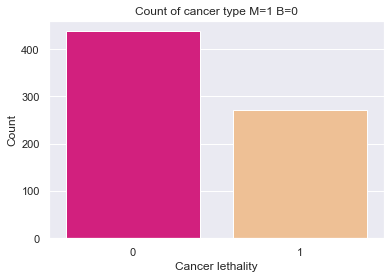

In [12]:

plt.title('Count of cancer type M=1 B=0')
sns.countplot(df_clean['stage'],palette = "Accent_r")
plt.xlabel('Cancer lethality')
plt.ylabel('Count')
plt.show()

In [13]:
df1.stage.value_counts()

B    438
M    271
Name: stage, dtype: int64

There are 438 patients who have a benign cancer lump and there are 271 patients whose cance lump is malignant.Majorit of the patients have a benign cancer lump within the dataset.

## 2.3 The relationsip between demography and the breast cancer stage

### 2.3.1 Age - Cancer Stage

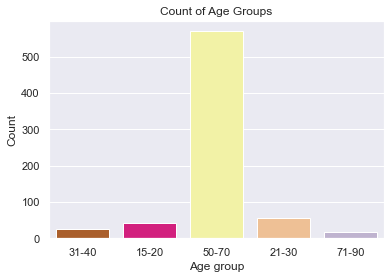

In [14]:
#number of patients in each age-group
plt.title('Count of Age Groups')
sns.countplot(df_clean['age-group'], palette = "Accent_r")
plt.xlabel('Age group')
plt.ylabel('Count')
plt.show()

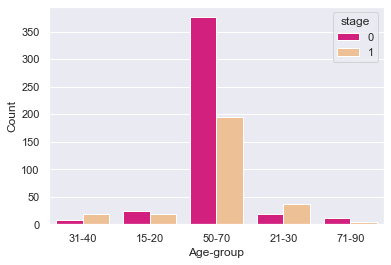

In [15]:
#the cancer stage in each age group
sns.countplot(x ='age-group', hue = "stage", data = df_clean, palette = "Accent_r")
plt.xlabel('Age-group')
plt.ylabel('Count')
plt.show()

Based on the visualization on the relationship between the age and the stage of breast cancer,majorit of the patients are part of the 50-70 age-group.The 50-70 age-group has the highest number of malignant breast cancer tumors among all the age groups. This communicates that patients who are within the 50-70 are being tested the most for signs of breast cancer.Among the age groups the patients that are between the ages of 31-40 and 21-30,patients that have a malignant breast cancer tumor are more than those who have a benign tumor. 

### 2.3.2 Gender - Cancer Stage

In [16]:
#percentage of cancer stages among males
df_males = df[df.gender == 'M']
df_males.stage.value_counts(normalize=True)*100

B    62.307692
M    37.692308
Name: stage, dtype: float64

In [17]:
##percentage of cancer stages among females
df_females = df[df.gender == 'F']
df_females.stage.value_counts(normalize=True)*100

B    58.365759
M    41.634241
Name: stage, dtype: float64

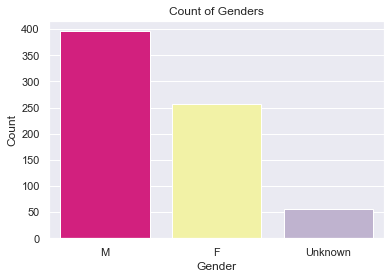

In [18]:
plt.title('Count of Genders')
sns.countplot(df_clean['gender'], palette = "Accent_r")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

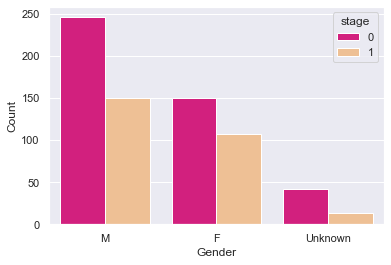

In [19]:
#cancer stages per gender category
sns.countplot(x ='gender', hue = "stage", data = df_clean, palette = "Accent_r")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

According to the data Males are the largest group of patients and they have the largest number of Benign breast cancer tumors and 37% of the Males within the data have a malignant breast cancer tumor.Within the data 58% of the women have a Malignant breat cancer tumor. 

## 2.4 Understanding the relationship between the cancer stage and the characteristics of the tumor

### 2.4.1 Overview of the correlations between the tumor characteristic and the breast cancer stage

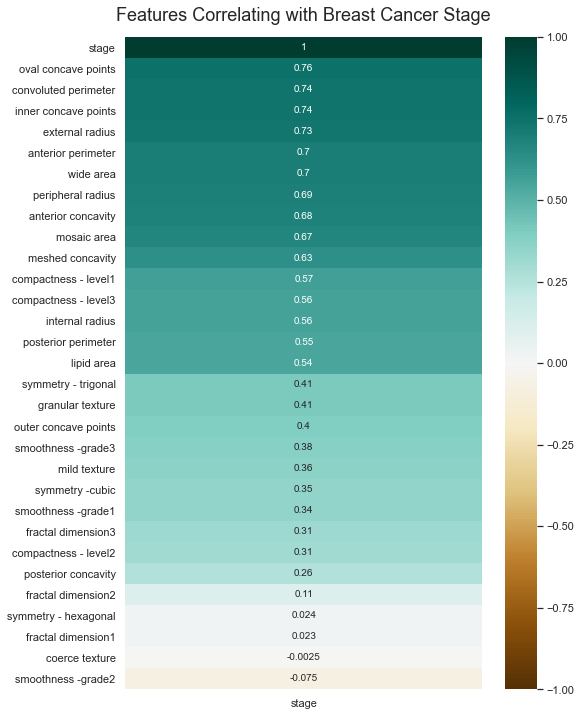

In [23]:
#heatmap of correlation to stage column
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_clean.corr()[['stage']].sort_values(by='stage', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Breast Cancer Stage', fontdict={'fontsize':18}, pad=16);

In [29]:
#list of highly correlated featurs to the stage column
corr_matrix = df_clean.corr()
corr_matrix[abs(corr_matrix['stage']) > 0.59].index

Index(['stage', 'inner concave points', 'external radius',
       'convoluted perimeter', 'oval concave points'],
      dtype='object')

The visual illustrated the correlations that exist between the stage column. More than 50% of the features are postively correlated to the 'stage' column.The highly correlated features play a crucial role in the stage of breast cancer in patients as these characteristics of the tumor can be used as an indicator of the stage that a patient is in.

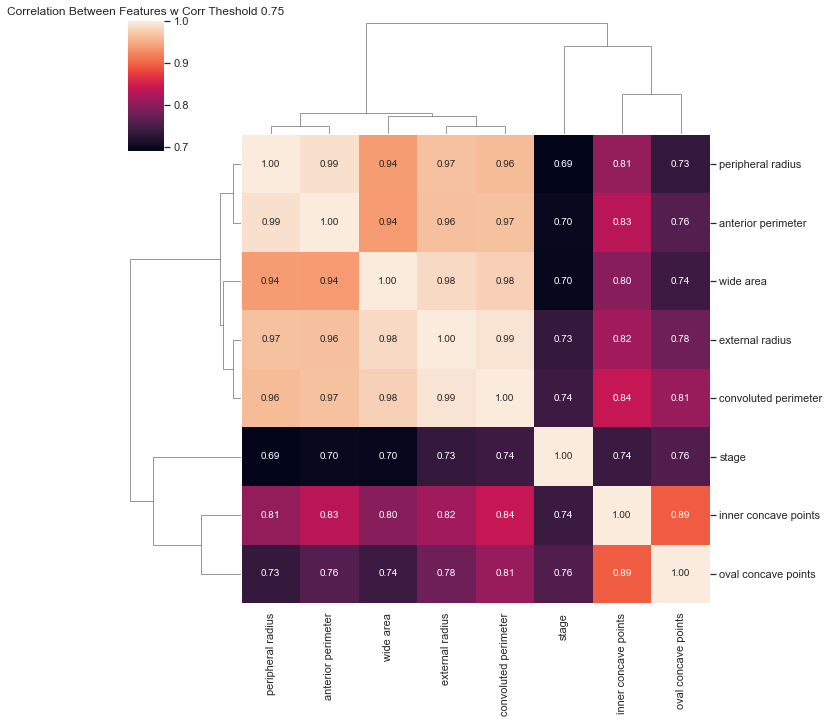

In [30]:
#correlation between the top features correlated to the stage column
threshold = 0.69 
filtre = np.abs(corr_matrix["stage"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df_clean[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

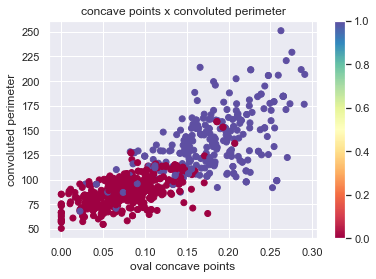

In [31]:
#relationship between top2 features correlated to the stage column
plt.scatter(df_clean['oval concave points'], df_clean['convoluted perimeter'], c=df_clean['stage'], cmap=plt.cm.Spectral)
plt.colorbar()
plt.xlabel('oval concave points')
plt.ylabel('convoluted perimeter')
plt.title('concave points x convoluted perimeter')
plt.show()

The oval concave points and the convulated perimeter have the highest correlation to the stage of cancer. This scatter plot illustrates that the higher the convulated perimeter and the oval concave point the higher the probaility that the tumor is Malignant.As well as the lower the convulated parimeter and the oval concave points the higher the probability that the tumor is Benign.

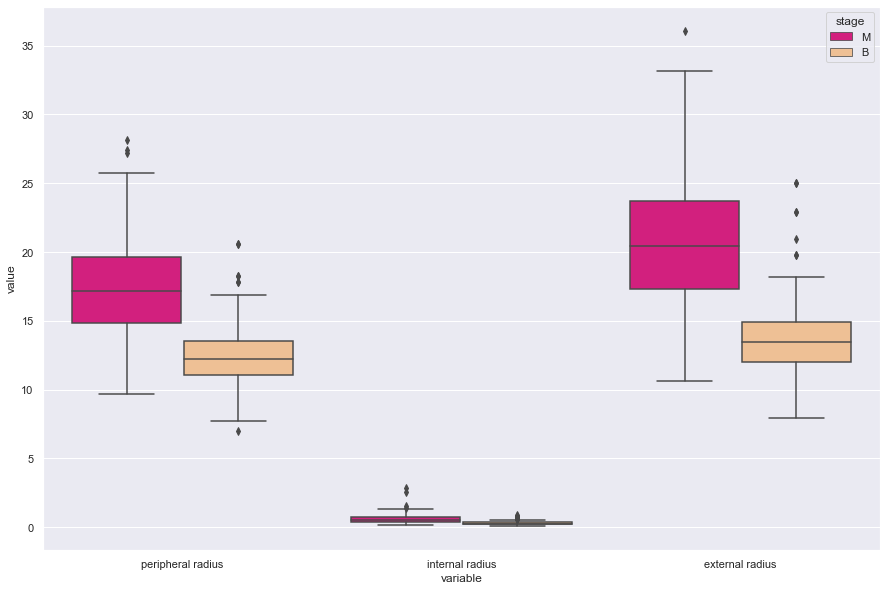

In [32]:
melted_data = pd.melt(df,id_vars = "stage",value_vars = ['peripheral radius', 'internal radius', 'external radius'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="stage",data= melted_data, palette = "Accent_r")
plt.show()

The boxplot illustrates the radius of the tumors the patients in the dataset have.Based on the visualization of the data a malignant breast cancer tumor is larger than a malignant tumor based on the peripherial radius,internal radius and the external radius.This insight can play a role in informing the detection of a malignant tumor.This insight does acknowledge the presence of benign tumors that are the same size as malignant tumors these form part of the outliers within the data.

## 2.5 Key  Insights from the Exploratory Data Analysis

* Women have a higher probability of getting breast cancer,however within the dataset more men were tested from breast cancer   and a large majorit of men had a benign breast cancer tumor
* People within the ages of 31-40 and 21-30 are not being tested for breast cancer as much as people within the 50-70 age group.According to the data out of the people that were tested in the 31-40 and 21-30 there were more malignant breast cancer tumors than benign tumors 
* The characteristics of the tumor does play are role in determining the breast cancer stage.

## 3 Preprocessing 

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

* Categorical Vairables

In [37]:
#Encoding Categorical Data
def encoder(df):

    features=[x for x in df.columns if df[x].dtype=="object"]


    le=LabelEncoder()

    df[features] = df[features].apply(lambda col:
                                      le.fit_transform(col.astype(str)),
                                      axis=0, result_type='expand')
    return df

In [39]:
df_enc = encoder(df_clean)
#check wether all columns are numerical data type
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stage                 709 non-null    int64  
 1   peripheral radius     709 non-null    float64
 2   mild texture          709 non-null    float64
 3   anterior perimeter    709 non-null    float64
 4   mosaic area           709 non-null    float64
 5   smoothness -grade1    709 non-null    float64
 6   compactness - level1  709 non-null    float64
 7   anterior concavity    709 non-null    float64
 8   inner concave points  709 non-null    float64
 9   symmetry -cubic       709 non-null    float64
 10  fractal dimension1    709 non-null    float64
 11  internal radius       709 non-null    float64
 12  coerce texture        709 non-null    float64
 13  posterior perimeter   709 non-null    float64
 14  lipid area            709 non-null    float64
 15  smoothness -grade2    7

In [40]:
df_enc.head()

,stage,peripheral radius,mild texture,anterior perimeter,mosaic area,smoothness -grade1,compactness - level1,anterior concavity,inner concave points,symmetry -cubic,...,convoluted perimeter,wide area,smoothness -grade3,compactness - level3,meshed concavity,oval concave points,symmetry - trigonal,fractal dimension3,age-group,gender
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2,1
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2,1


## Standerdization 